In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import glob
import re
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from plotnine import * 
import plotnine.options

In [2]:
sys.path.insert(1, '/secure/projects/HTAPP_MBC/src/')

In [3]:
from init_phase2 import * 

In [4]:
adata=sc.read_h5ad(out_dir+"/fresh_frozen_combined.h5ad")

In [5]:
adata.obs['cell_type']=pd.Categorical(adata.obs['cell_type'], categories=colors.index)
adata.obs['compartments']=pd.Categorical(adata.obs['compartments'], categories=["Malignant","Stromal","Lymphoid","Myeloid"])

### Check CODEX gene panel expression

In [6]:
metaDir=codeDir+"/meta"
codex=pd.read_csv(metaDir+"/spatial_markers.tsv",sep="\t")
codex.head()

specification method    gene     gene_orig alternative comment  \
0        frozen  codex  ENTPD1          CD39         NaN     new   
1        frozen  codex   CXCR5         CXCR5         NaN     new   
2         fixed  codex   ACTA2     alpha-SMA       ACTA2     NaN   
3         fixed  codex    BCL2         BCL-2        BCL2     NaN   
4         fixed  codex  CTNNB1  beta-catenin      CTNNB1     NaN   

          type_detail       type  
0                 NaN     immune  
1                 NaN     immune  
2      myofibroblasts     stroma  
3           apoptosis  apoptosis  
4  cell-cell adhesion     stroma

In [7]:
genes=codex.loc[codex.specification=="frozen",]
genes=genes.loc[genes.gene.isin(adata.var.index),:].sort_values("type_detail").sort_values("type")
genes

specification method      gene    gene_orig        alternative    comment  \
122        frozen  codex     KRT16  cytokeratin          KRT[1-20]  ambiguous   
123        frozen  codex     KRT17  cytokeratin          KRT[1-20]  ambiguous   
125        frozen  codex     KRT19  cytokeratin          KRT[1-20]  ambiguous   
120        frozen  codex     KRT14  cytokeratin          KRT[1-20]  ambiguous   
27         frozen  codex      CD1C         CD1c               CD1C        NaN   
74         frozen  codex       CD5          CD5                CD5        NaN   
48         frozen  codex      CD3D          CD3               CD3D  ambiguous   
19         frozen  codex     CTLA4        CD152              CTLA4        NaN   
36         frozen  codex     ISG20         CD25    IL2RA /// ISG20  ambiguous   
35         frozen  codex     IL2RA         CD25    IL2RA /// ISG20  ambiguous   
57         frozen  codex      CD38         CD38               CD38        NaN   
85         frozen  codex       CD7          CD7                CD7        NaN   
93         frozen  codex      THY1         CD90               THY1        NaN   
0          frozen  codex    ENTPD1         CD39                NaN        new   
147        frozen  codex     HLA-B      HLA-ABC          HLA-[ABC]  ambiguous   
146        frozen  codex     HLA-A      HLA-ABC          HLA-[ABC]  ambiguous   
14         frozen  codex      IL7R        CD127               IL7R        NaN   
88         frozen  codex      CD8A          CD8               CD8A        NaN   
10         frozen  codex     ITGAX        CD11c              ITGAX        NaN   
60         frozen  codex       CD4          CD4                CD4        NaN   
131        frozen  codex     FOXP3        Foxp3              FOXP3        NaN   
28         frozen  codex       CD2          CD2                CD2        NaN   
1          frozen  codex     CXCR5        CXCR5                NaN        new   
149        frozen  codex   HLA-DRA       HLA-DR            HLA-DRA        NaN   
21         frozen  codex    FCGR3A         CD16  FCGR3A /// FCGR3B  ambiguous   
22         frozen  codex    FCGR3B         CD16  FCGR3A /// FCGR3B  ambiguous   
76         frozen  codex     NCAM1         CD56              NCAM1        NaN   
91         frozen  codex    LILRB1        CD85j             LILRB1        NaN   
84         frozen  codex      CD69         CD69               CD69        NaN   
20         frozen  codex    CD40LG        CD154             CD40LG        NaN   
65         frozen  codex     PTPRC         CD45              PTPRC        NaN   
153        frozen  codex      IGHM          IgM               IGHM        NaN   
26         frozen  codex      CD19         CD19               CD19        NaN   
25         frozen  codex     CXCR5        CD185              CXCR5        NaN   
68         frozen  codex     PTPRC       CD45RA              PTPRC        NaN   
79         frozen  codex    B3GAT1         CD57             B3GAT1        NaN   
44         frozen  codex      ICOS        CD278               ICOS        NaN   
42         frozen  codex     CD274        CD274              CD274        NaN   
46         frozen  codex     PDCD1        CD279              PDCD1        NaN   
41         frozen  codex  PDCD1LG2        CD273           PDCD1LG2        NaN   
56         frozen  codex      CD36         CD36               CD36        NaN   
199        frozen  codex      PDPN   podoplanin               PDPN        NaN   
98         frozen  codex    COL4A4  collagen IV         COL4A[1-6]  ambiguous   
97         frozen  codex    COL4A3  collagen IV         COL4A[1-6]  ambiguous   
169        frozen  codex     MMP12        MMP12              MMP12        NaN   
51         frozen  codex    PECAM1         CD31             PECAM1        NaN   
130        frozen  codex       FAP          FAP                FAP        NaN   
75         frozen  codex     ICAM1         CD54              ICAM1        NaN   
208        frozen  codex       VIM 

/secure/src/anaconda3/envs/scanpy/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/secure/src/anaconda3/envs/scanpy/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


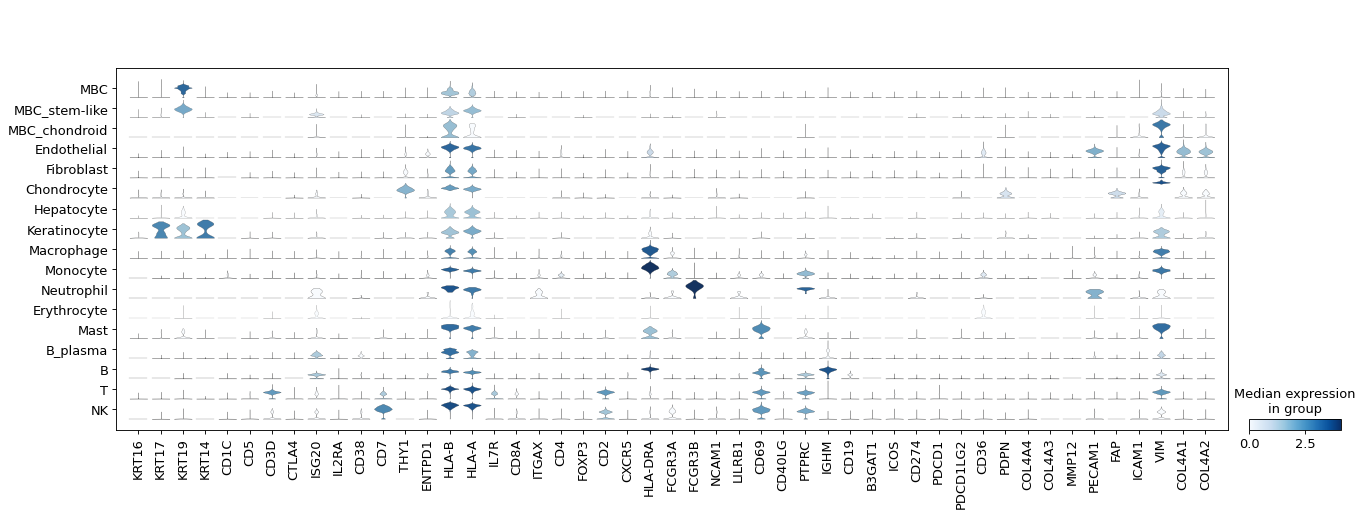

In [8]:
sc.pl.stacked_violin(adata[adata.obs.condition=="fresh"], var_names=genes.gene.unique(),groupby="cell_type")

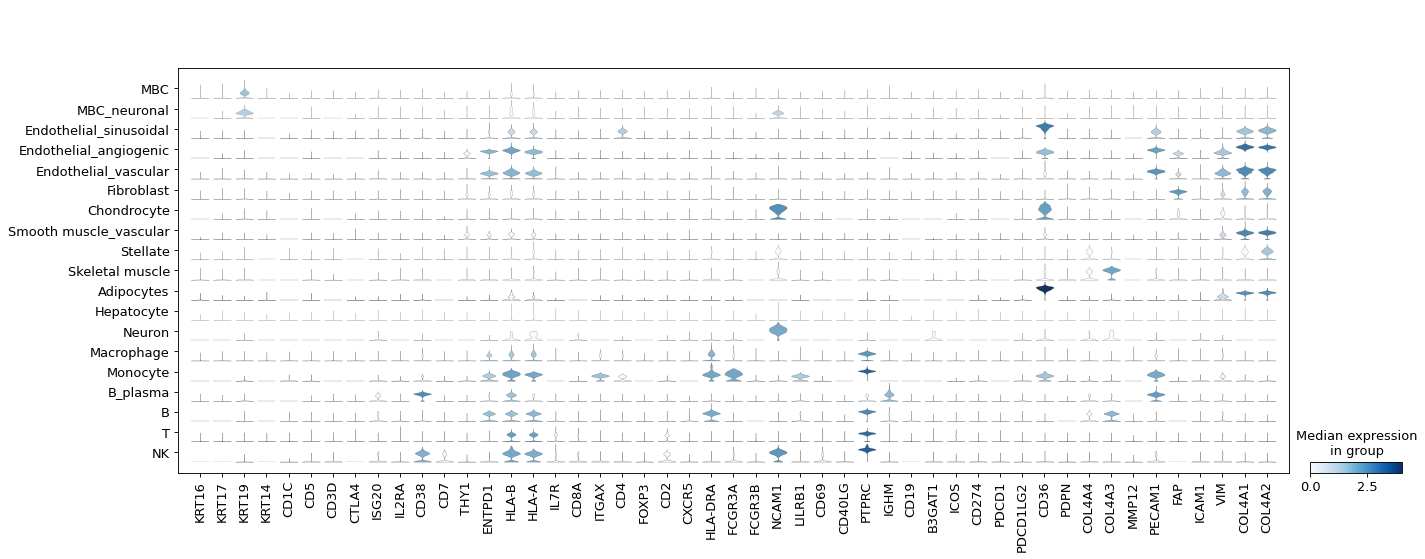

In [9]:
sc.pl.stacked_violin(adata[adata.obs.condition=="TST"], var_names=genes.gene.unique(),groupby="cell_type")

### Check Hepatocyte/Epithelial marker expression

In [13]:
tmp_obs=adata.obs.copy()
tmp_obs.loc[:,["ALB","KRT19","EPCAM","F9","FGA","ESRP1","GATA3"]]=adata.raw[:,["ALB","KRT19","EPCAM","F9","FGA","ESRP1","GATA3"]].X.todense()

In [14]:
tmp_obs["hep_group"]=tmp_obs["compartments"].astype(str)
tmp_obs.loc[tmp_obs["cell_type"]=="Hepatocyte","hep_group"]="Hepatocyte"
tmp_obs["hep_group"]=tmp_obs["hep_group"].astype('category')

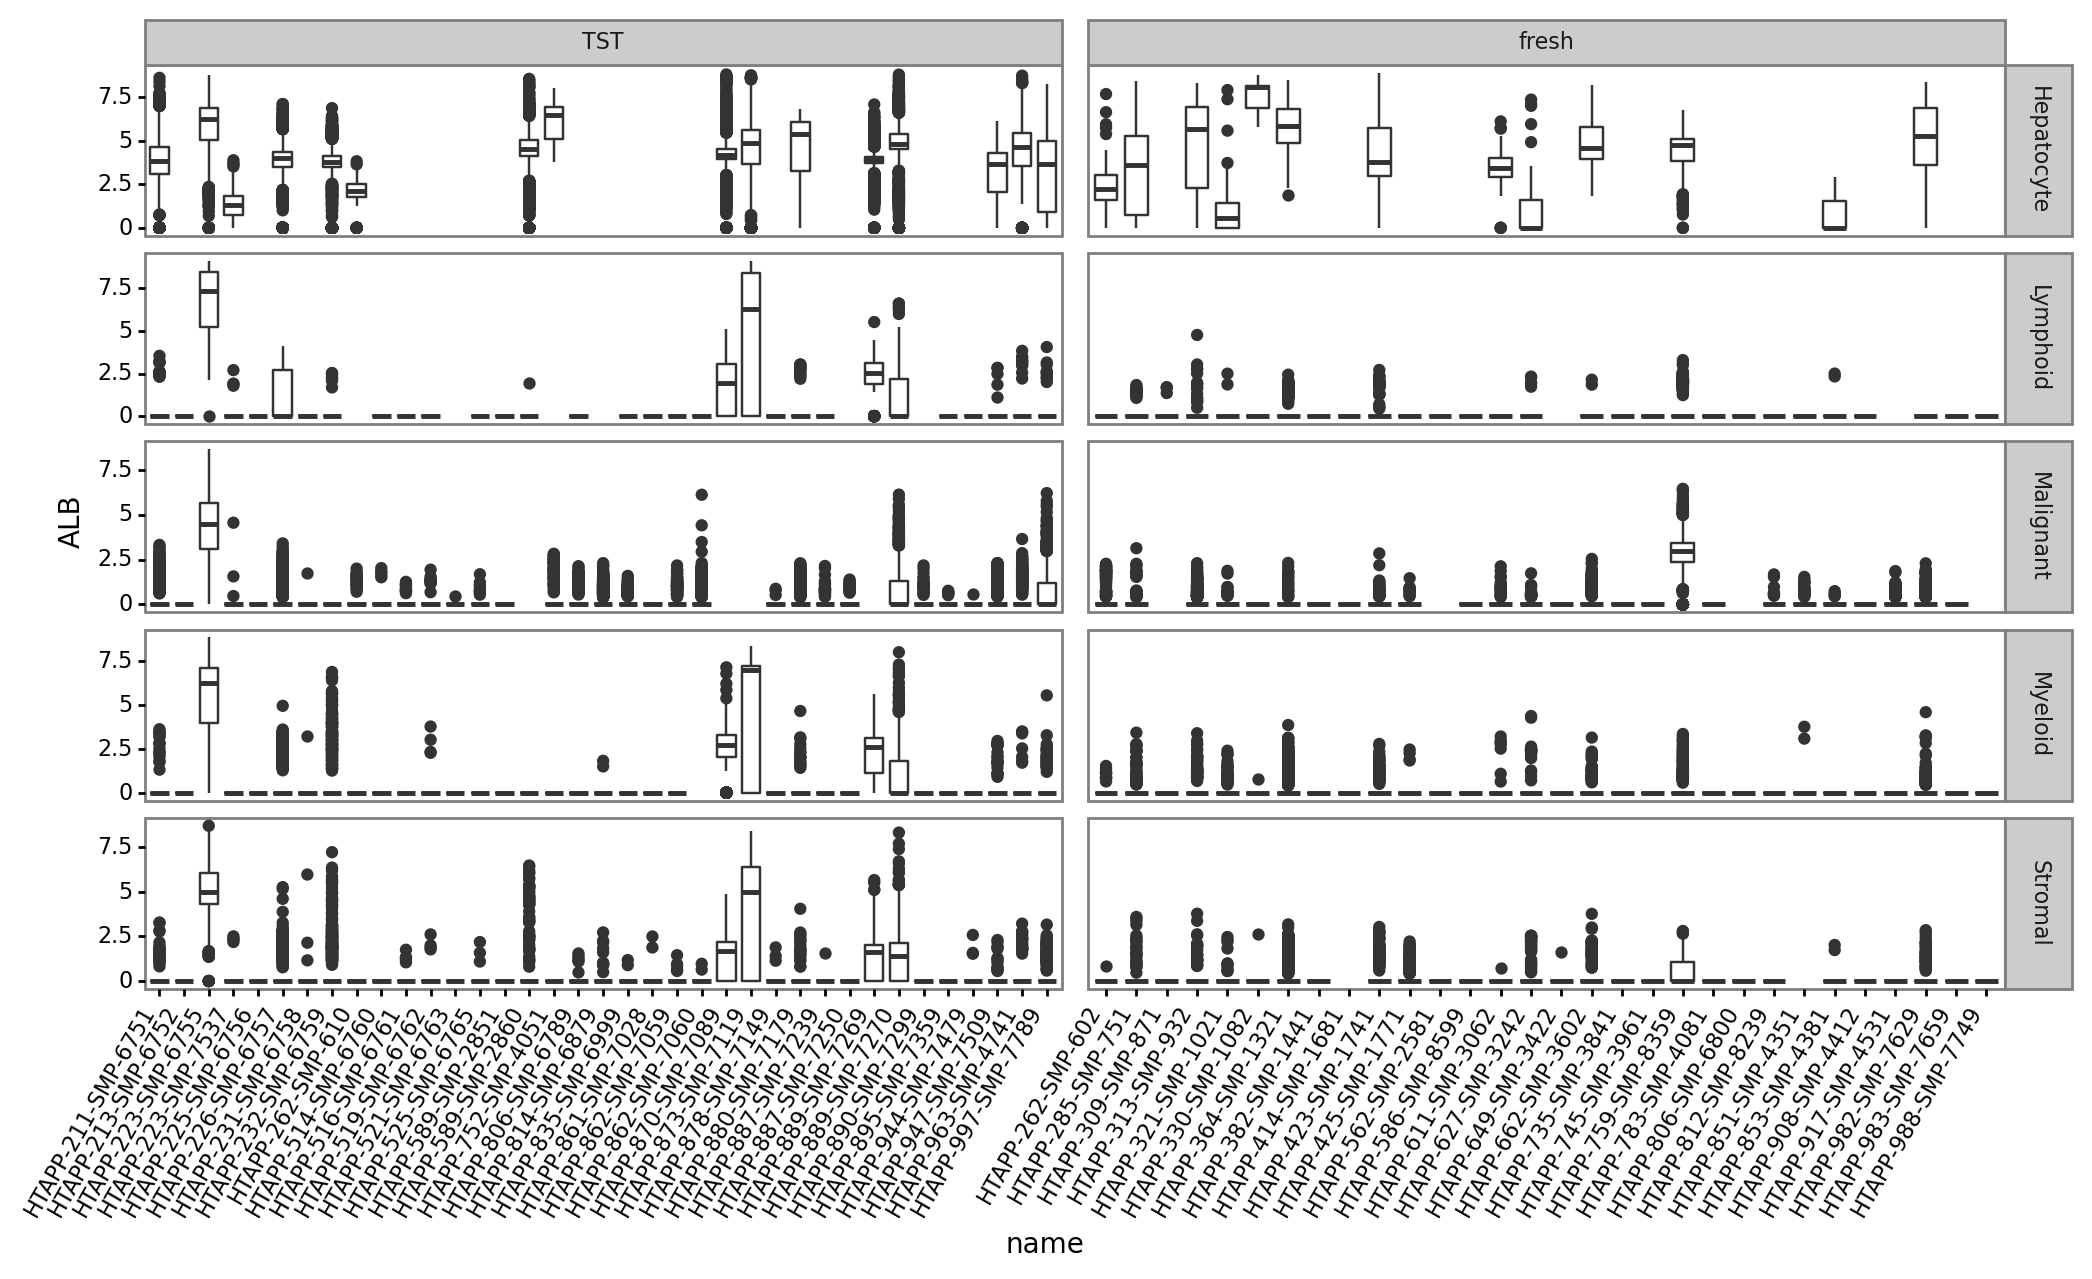

In [8]:
pl=ggplot(tmp_obs,aes(x='name',y='ALB'))+geom_boxplot()+facet_grid(['hep_group','condition'],scales="free")+rotate_labels()
pl.draw().set_size_inches(12, 6)

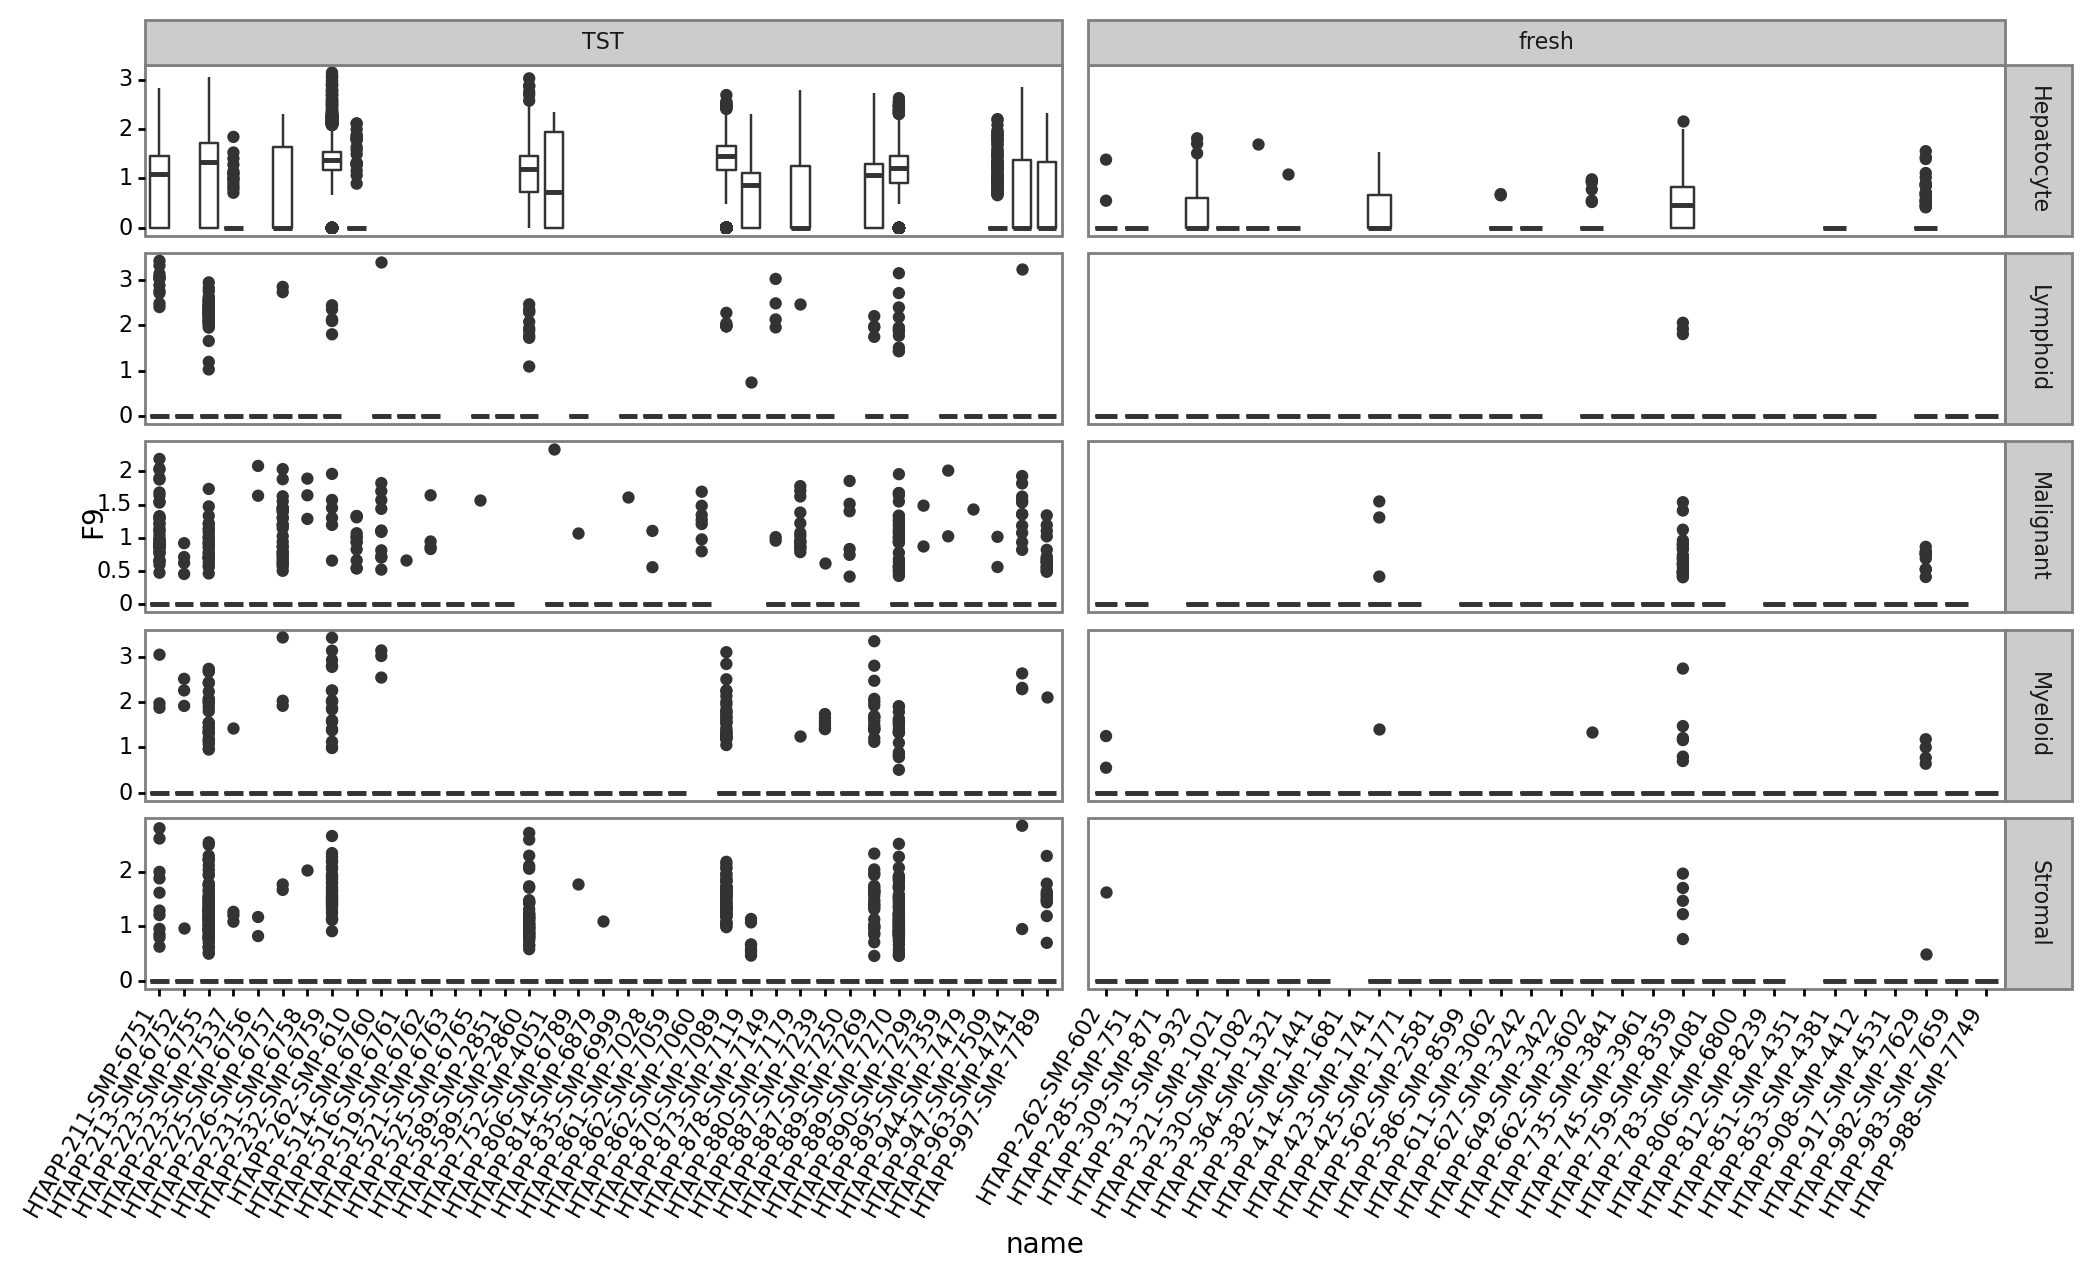

In [117]:
pl=ggplot(tmp_obs,aes(x='name',y='F9'))+geom_boxplot()+facet_grid(['hep_group','condition'],scales="free")+rotate_labels()
pl.draw().set_size_inches(12, 6)

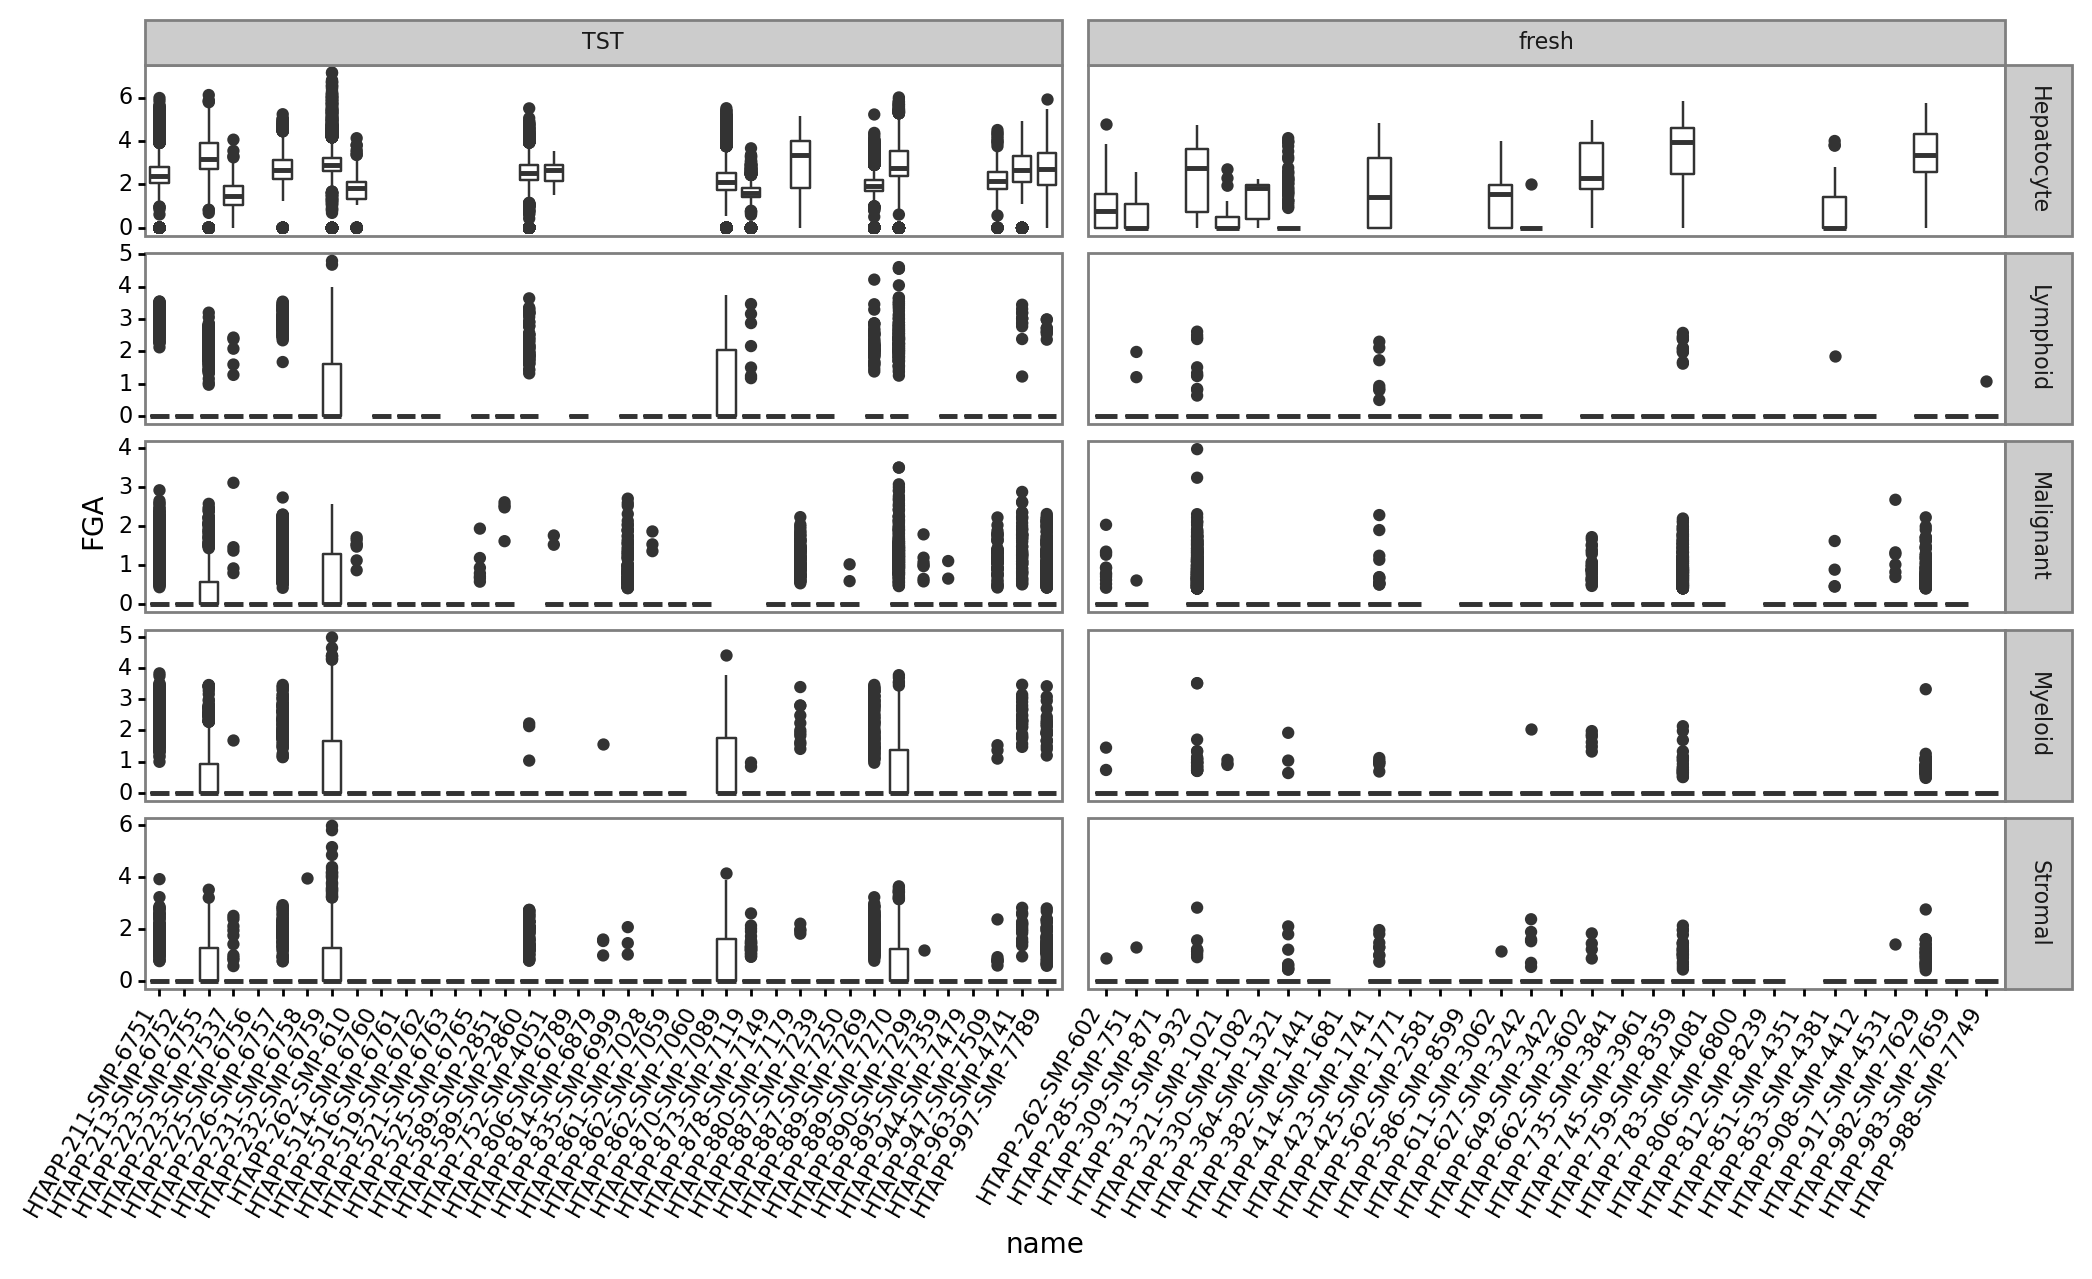

In [124]:
pl=ggplot(tmp_obs,aes(x='name',y='FGA'))+geom_boxplot()+facet_grid(['hep_group','condition'],scales="free")+rotate_labels()
pl.draw().set_size_inches(12, 6)

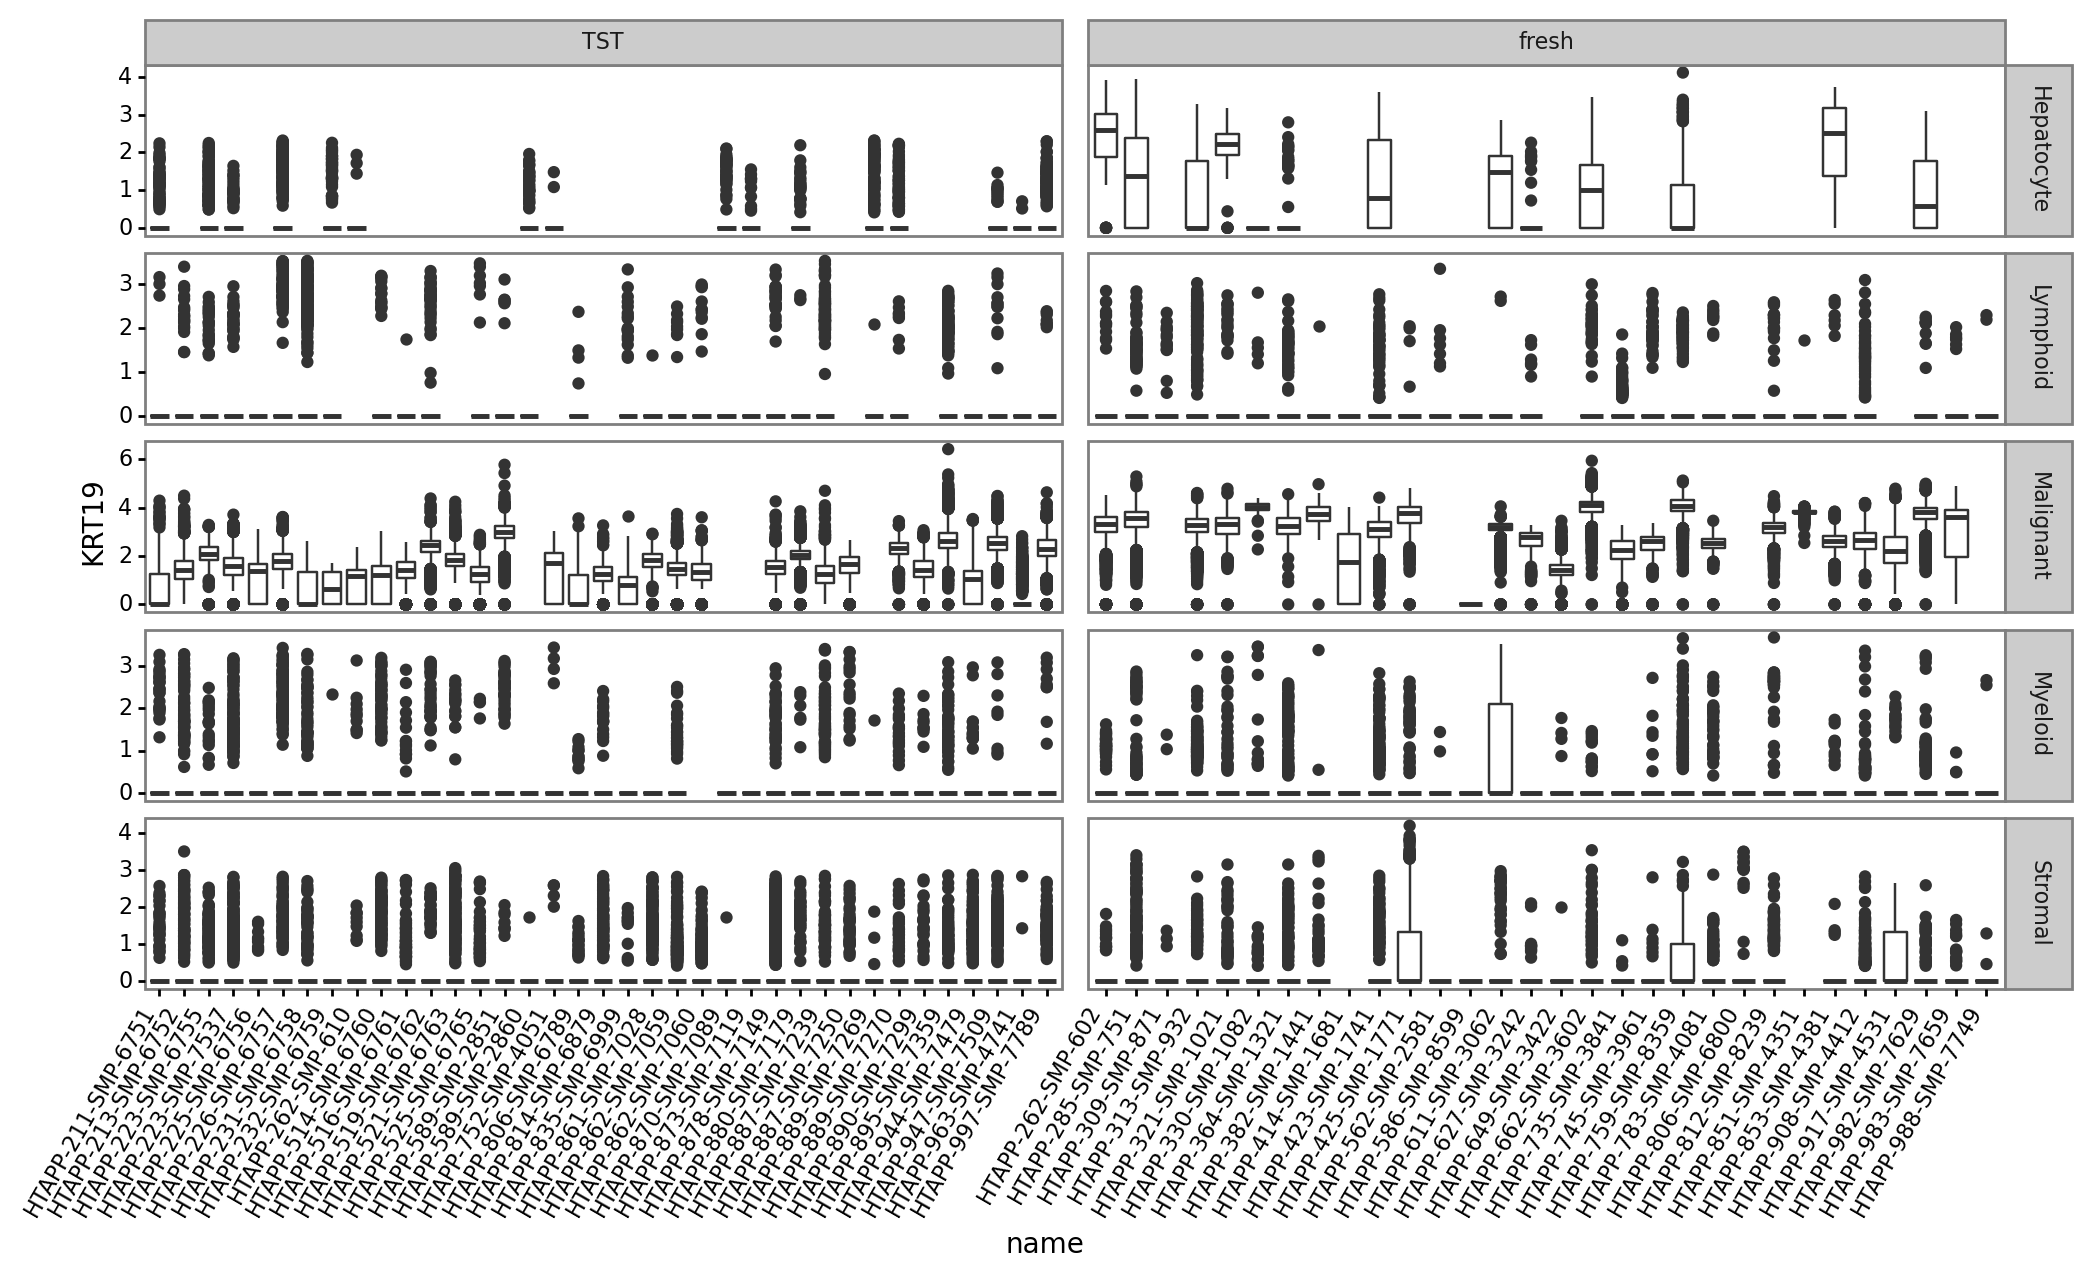

In [118]:
pl=ggplot(tmp_obs,aes(x='name',y='KRT19'))+geom_boxplot()+facet_grid(['hep_group','condition'],scales="free")+rotate_labels()
pl.draw().set_size_inches(12, 6)

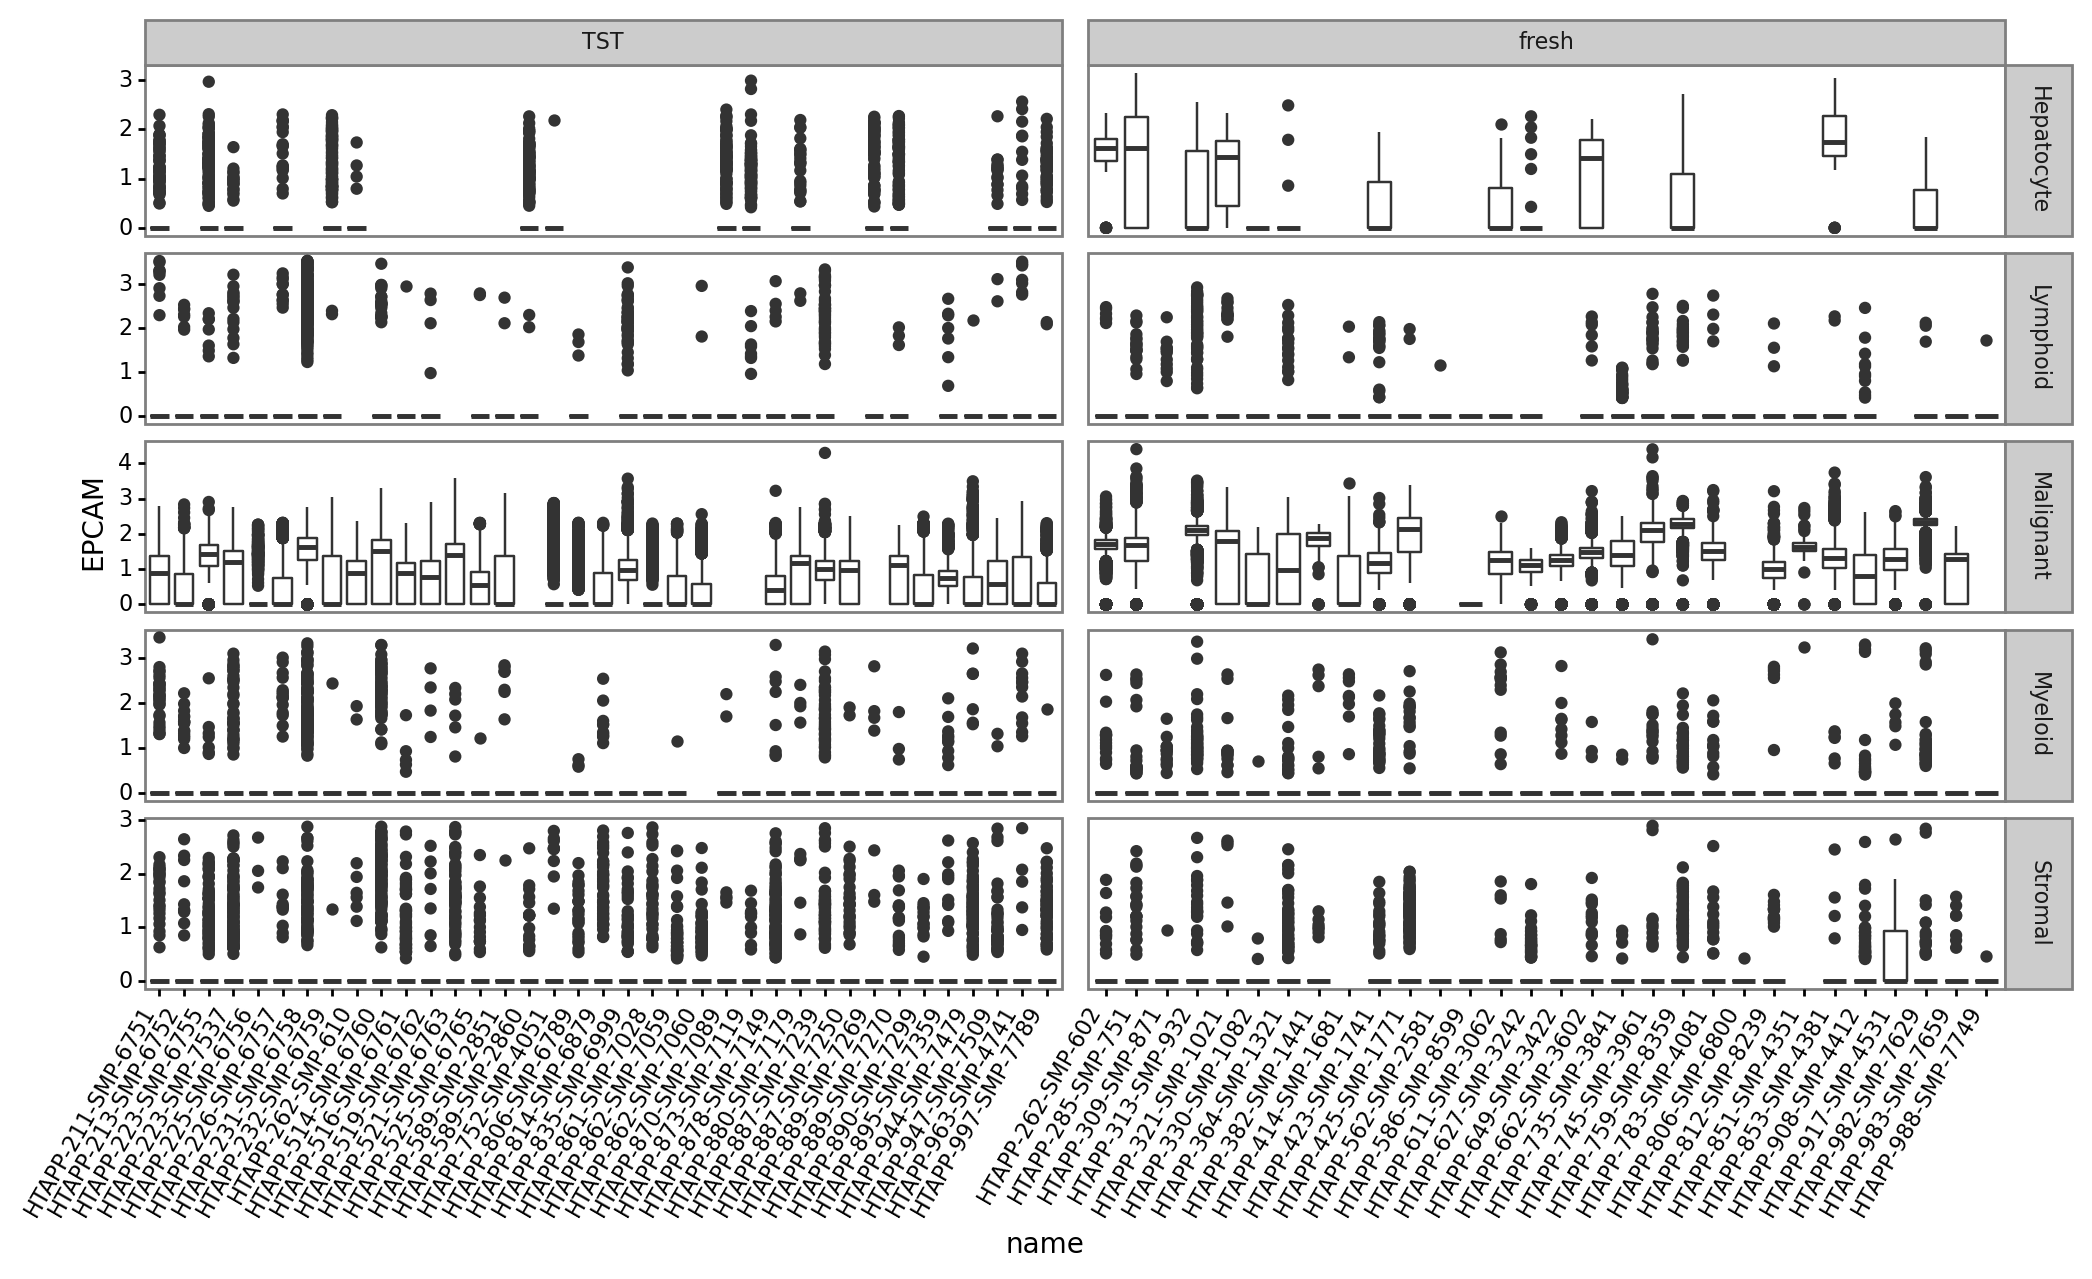

In [119]:
pl=ggplot(tmp_obs,aes(x='name',y='EPCAM'))+geom_boxplot()+facet_grid(['hep_group','condition'],scales="free")+rotate_labels()
pl.draw().set_size_inches(12, 6)

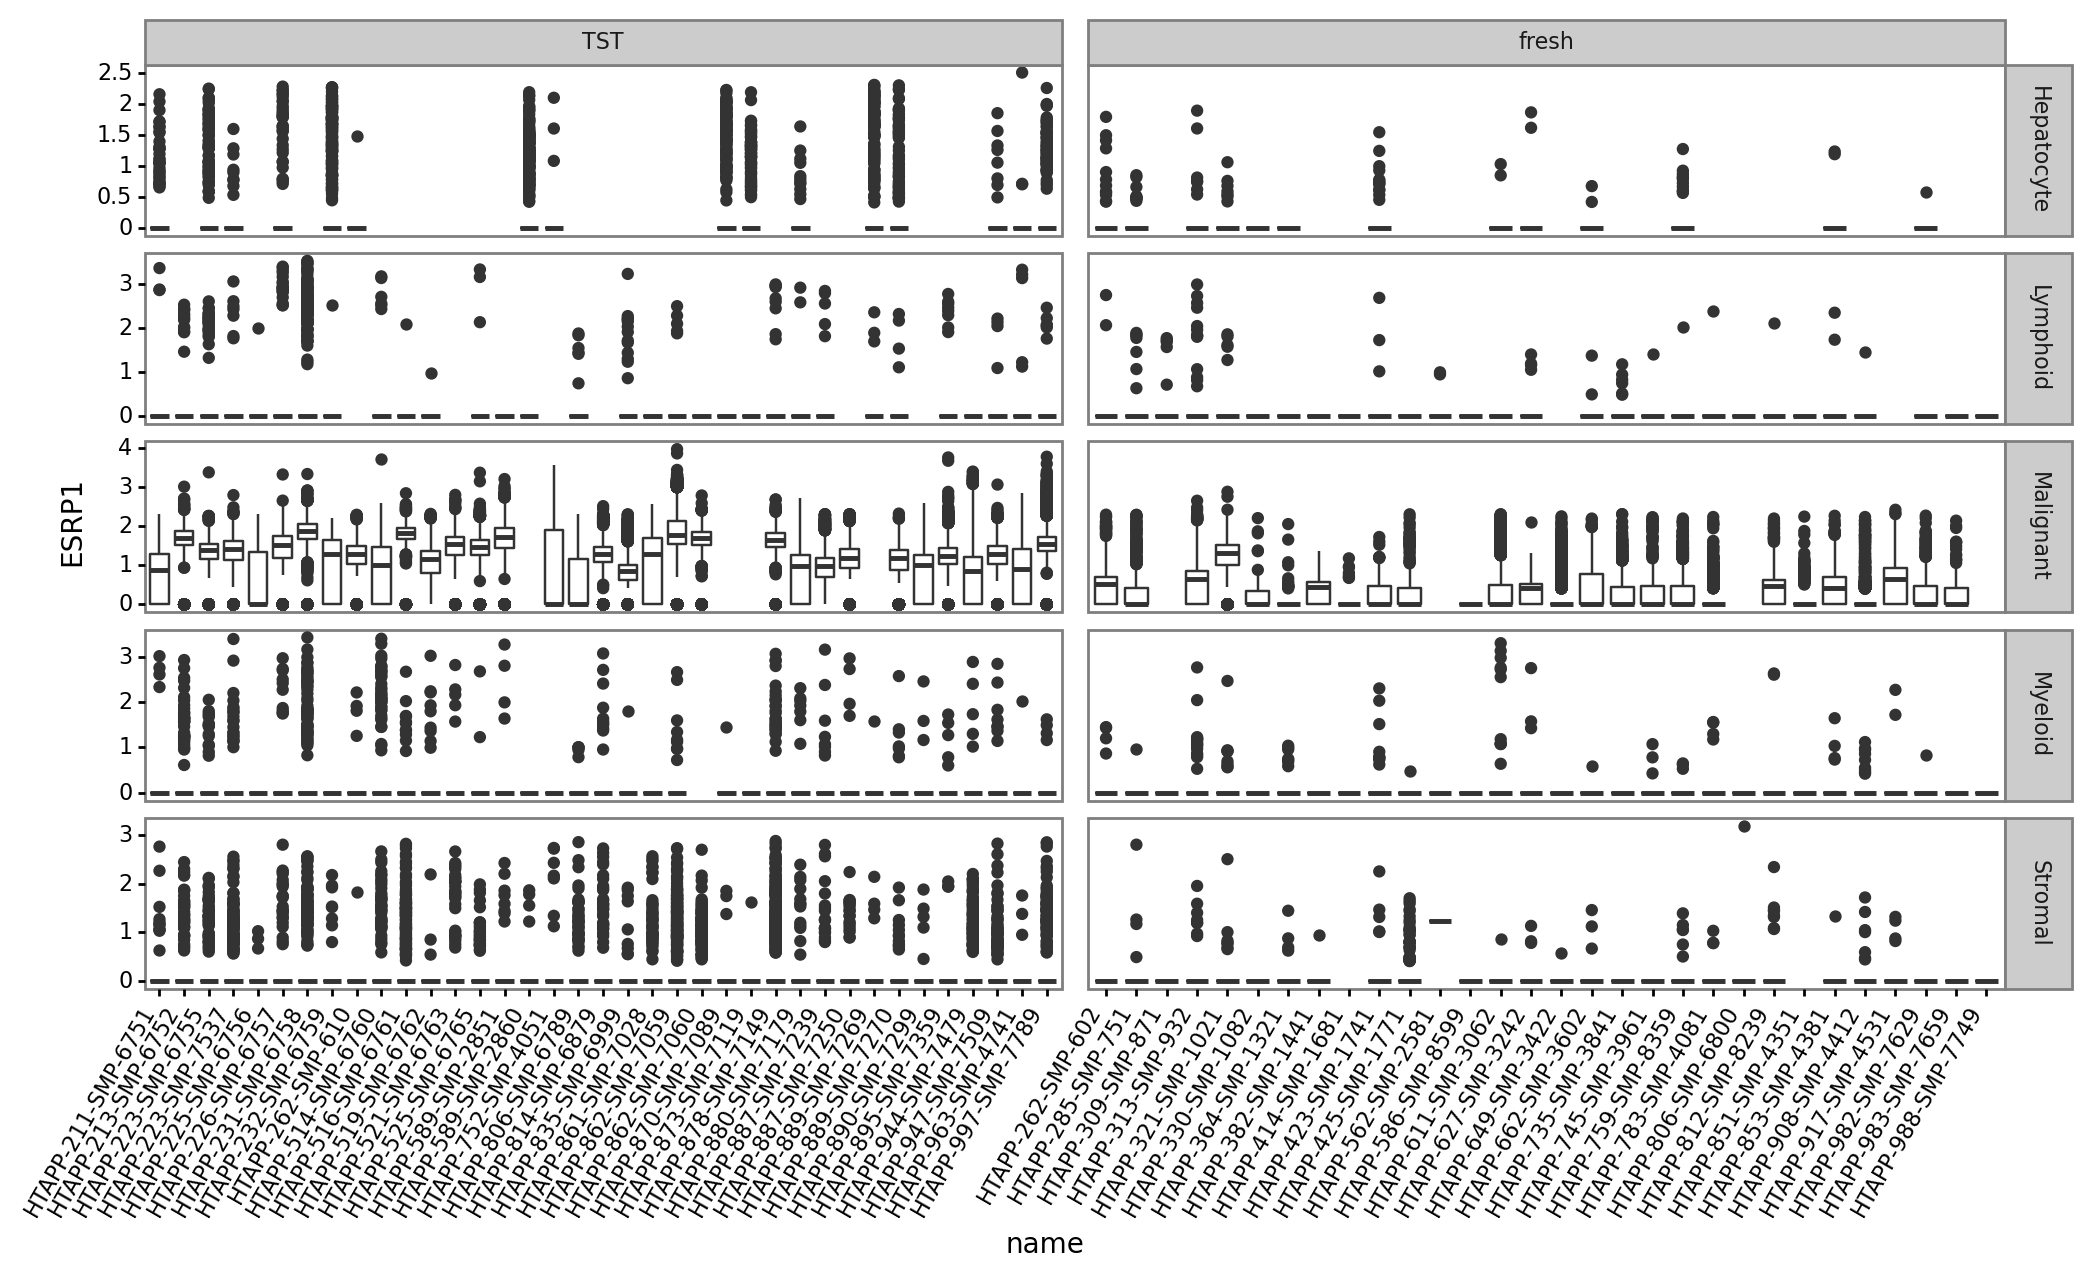

In [15]:
pl=ggplot(tmp_obs,aes(x='name',y='ESRP1'))+geom_boxplot()+facet_grid(['hep_group','condition'],scales="free")+rotate_labels()
pl.draw().set_size_inches(12, 6)

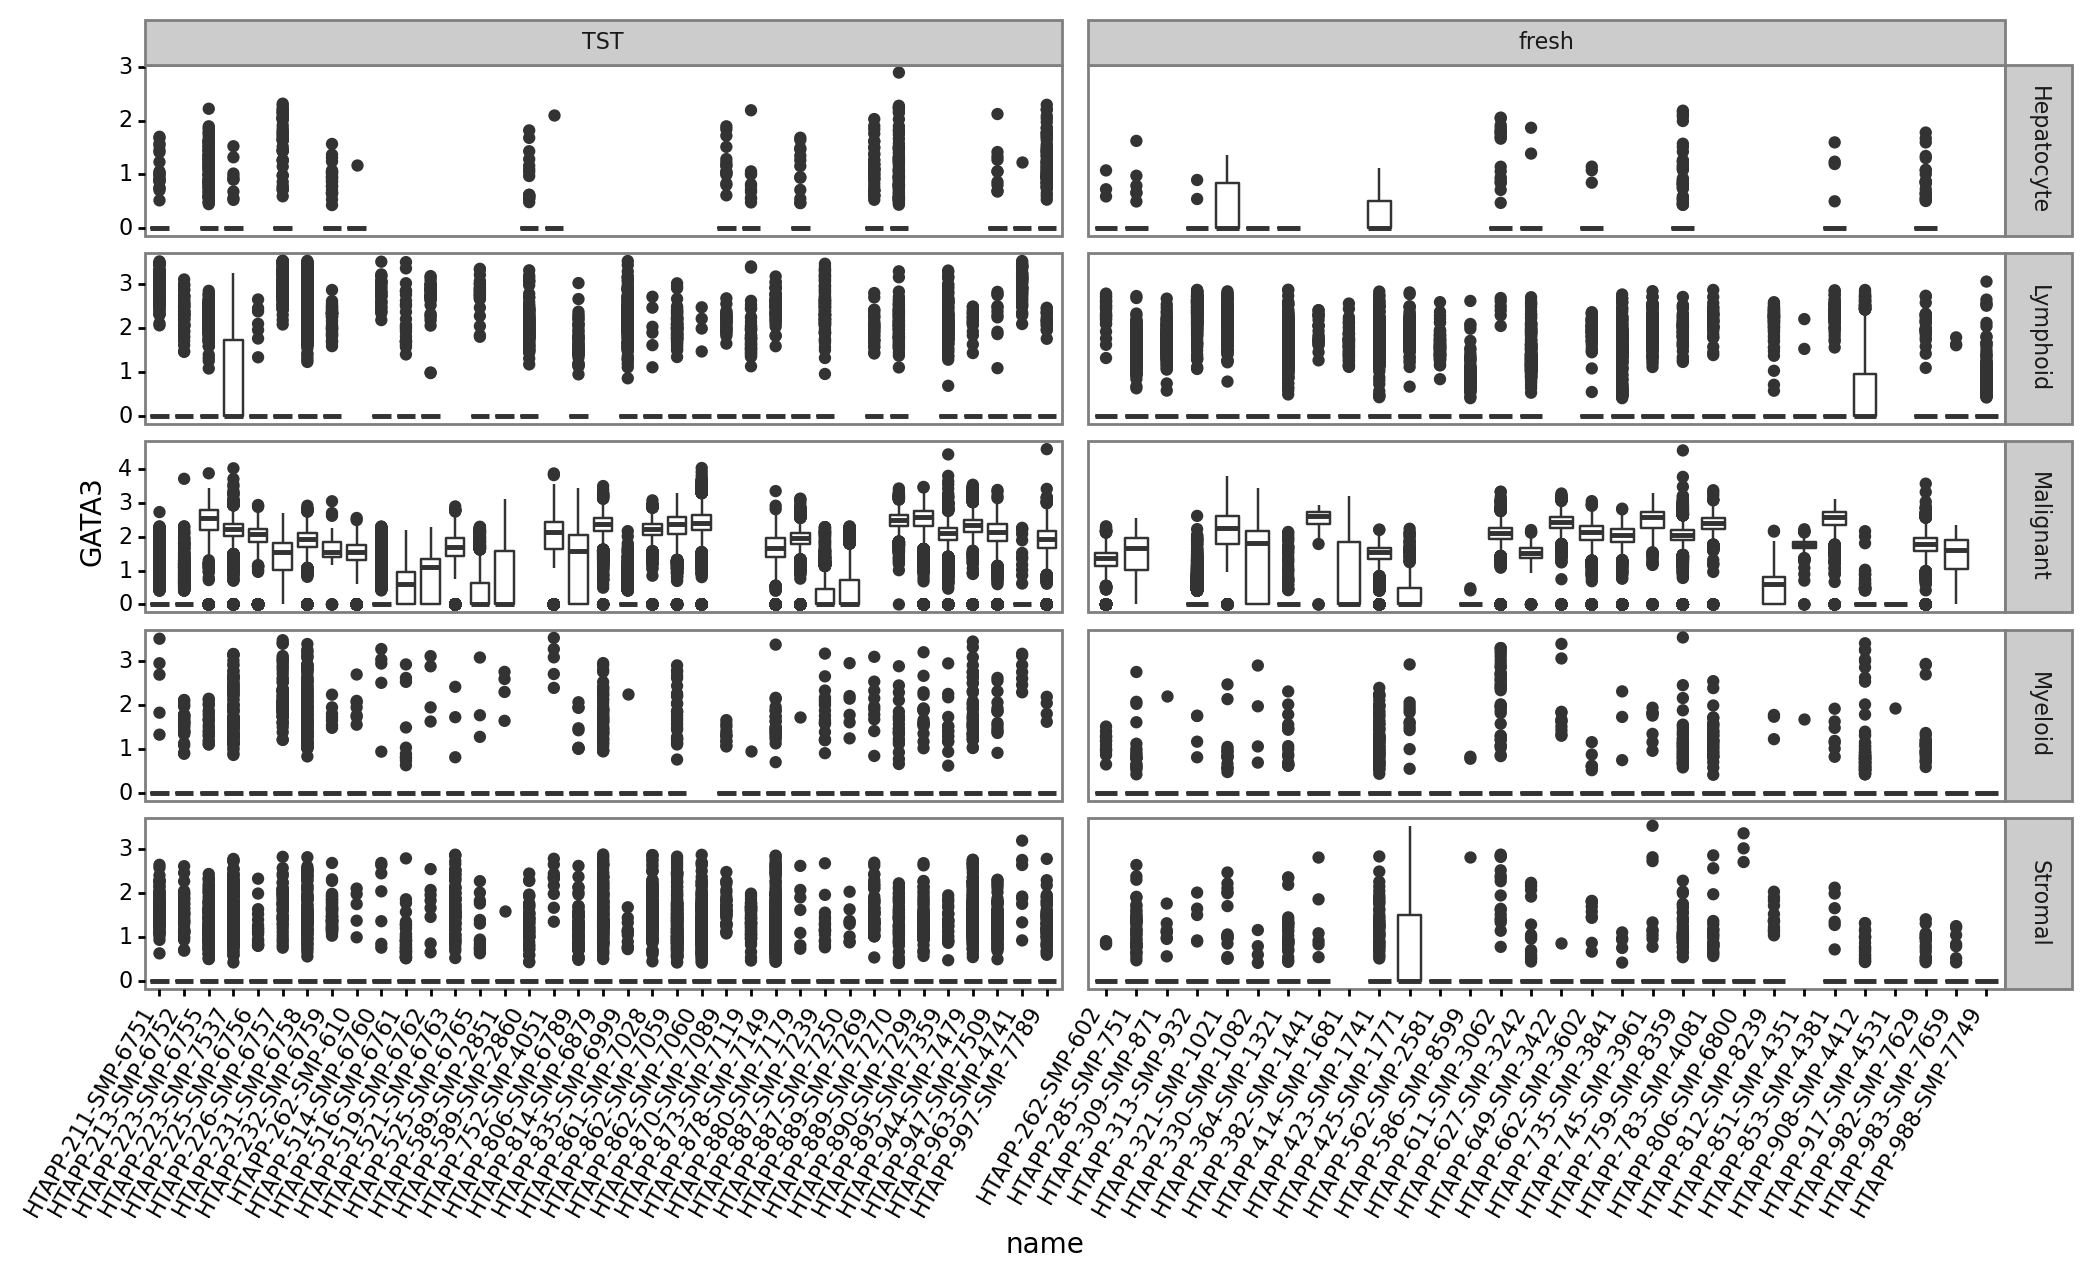

In [16]:
pl=ggplot(tmp_obs,aes(x='name',y='GATA3'))+geom_boxplot()+facet_grid(['hep_group','condition'],scales="free")+rotate_labels()
pl.draw().set_size_inches(12, 6)

In [ ]:
"HTAPP-853-SMP-4381"
"HTAPP-262-SMP-602"


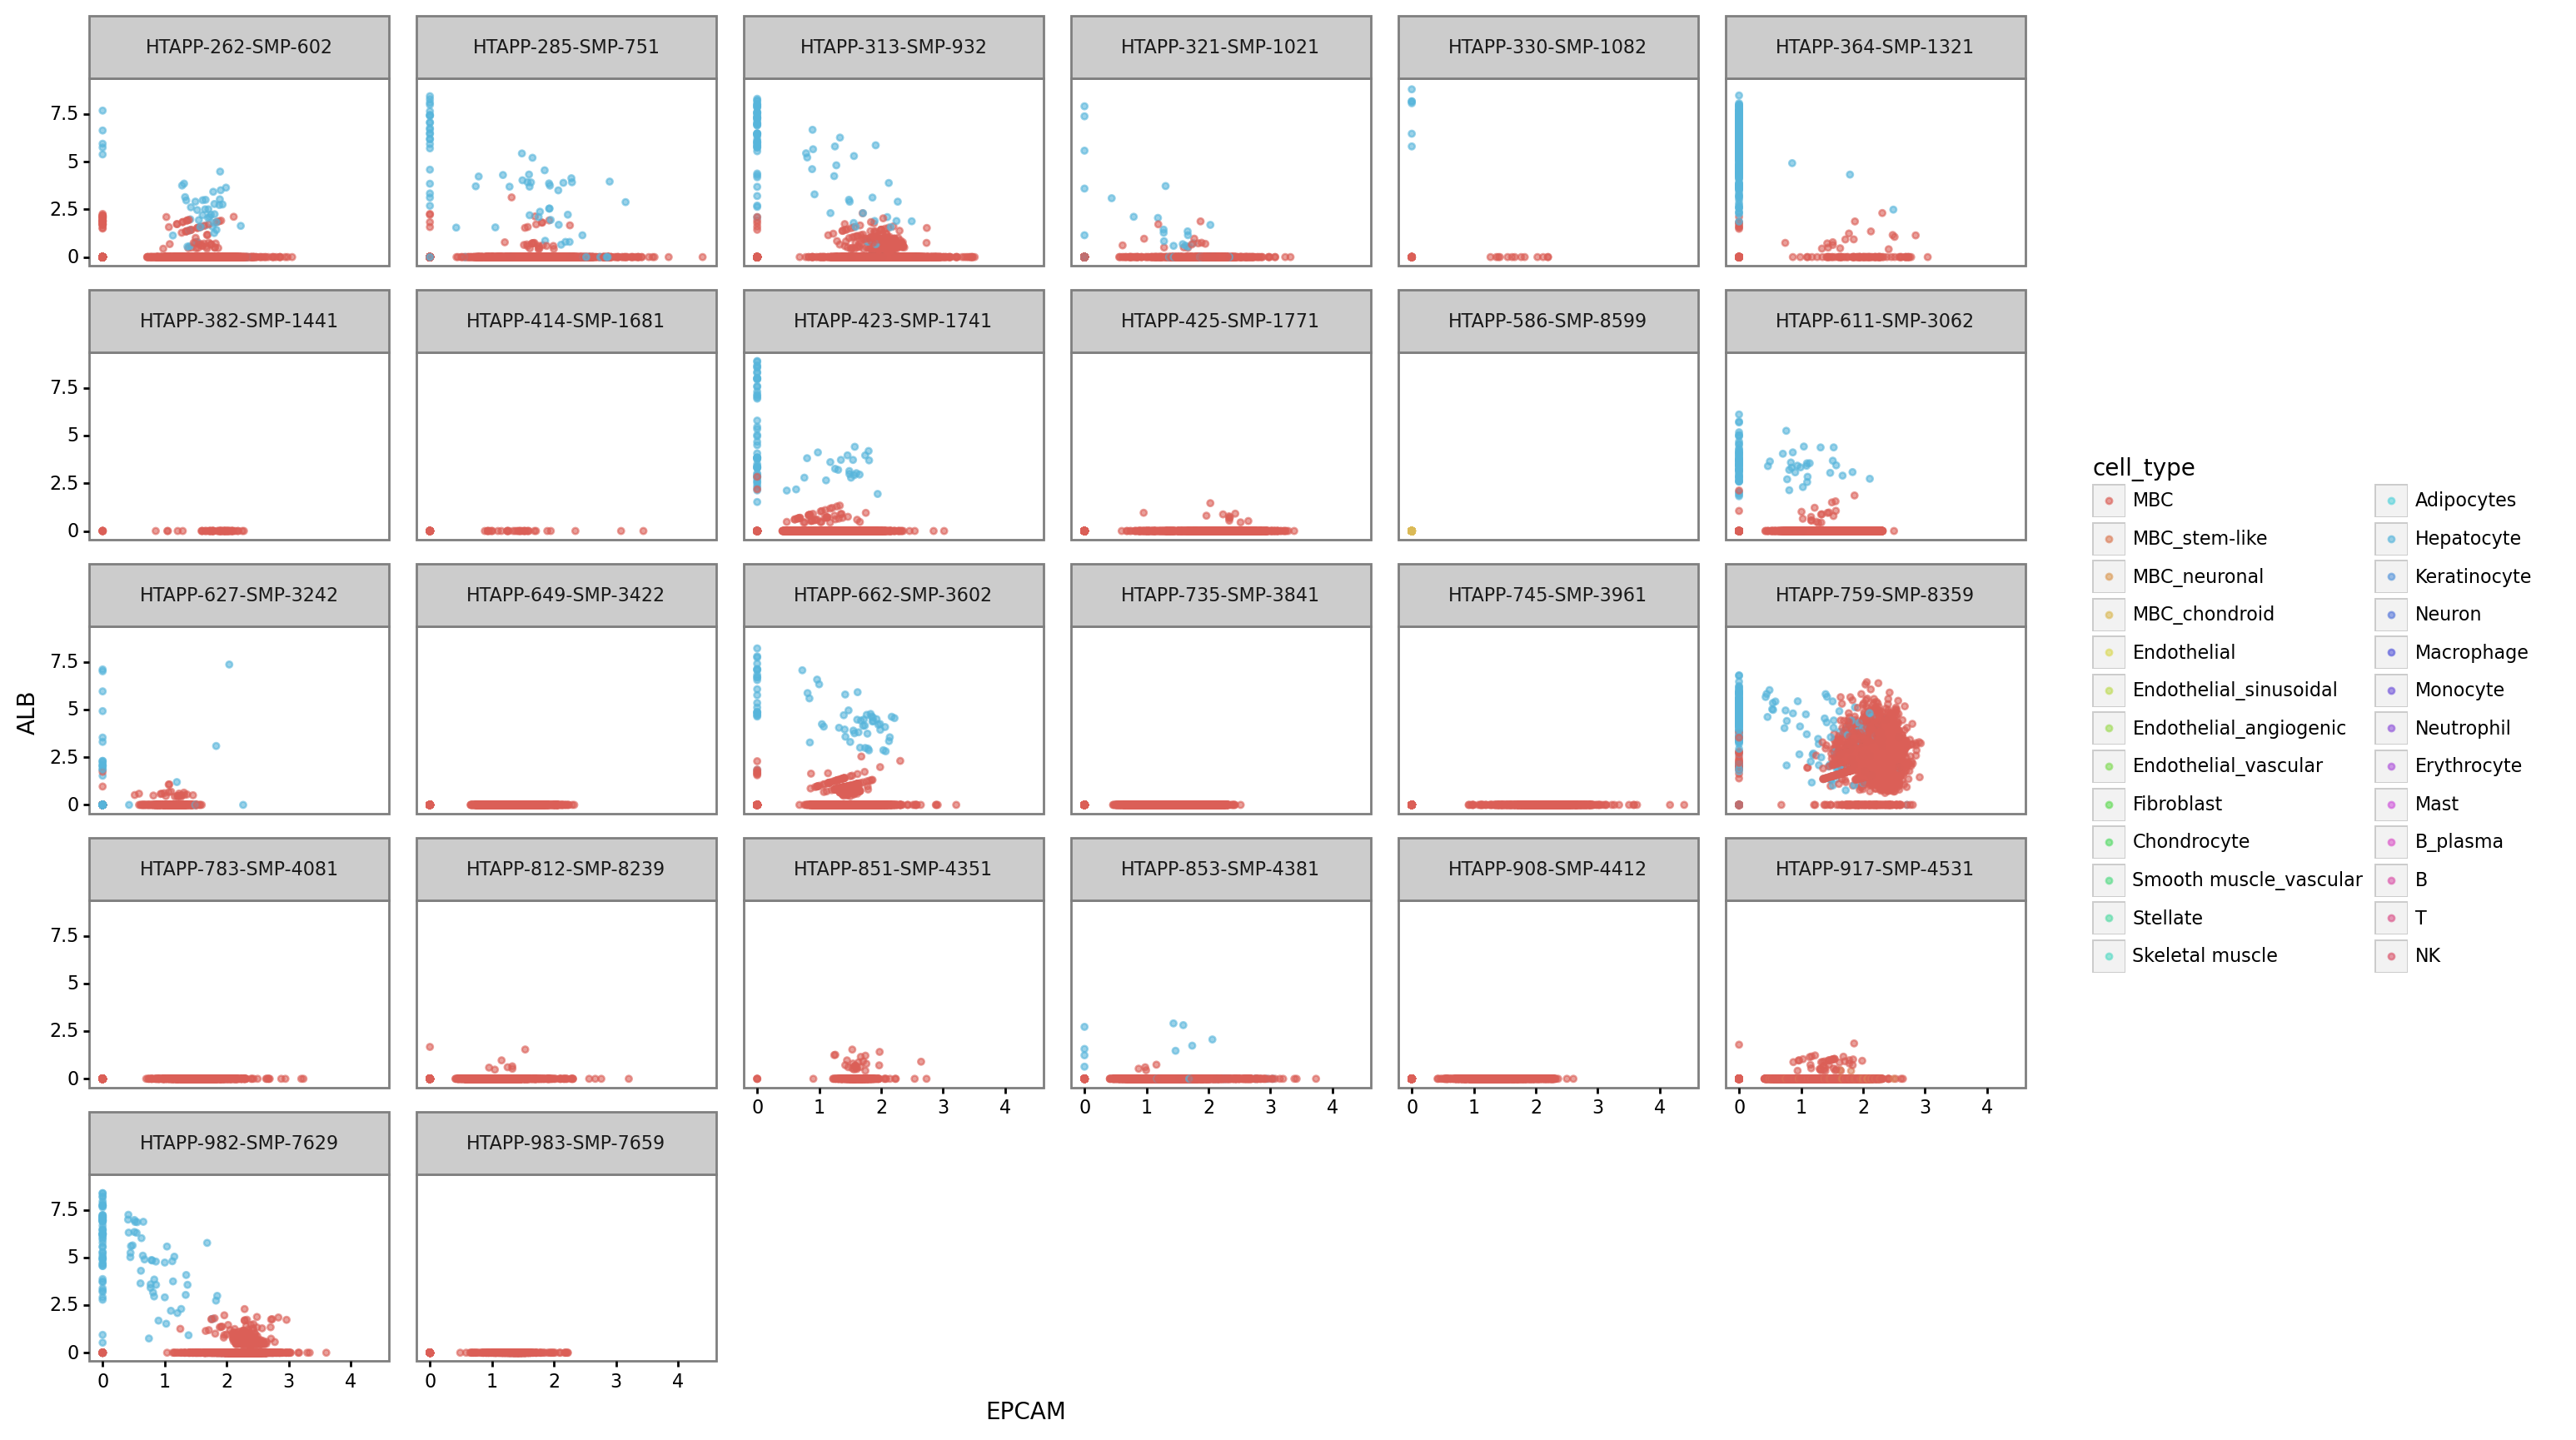

In [29]:
pl=ggplot(tmp_obs.loc[(tmp_obs.condition=="fresh")&(tmp_obs.cell_type.isin(["Hepatocyte","MBC","MBC_stem-like","MBC_neuronal","MBC_chondroid"])),:],aes(x="EPCAM",y="ALB",color="cell_type"))+geom_point(alpha=0.6, size=1)+facet_wrap("name")
pl.draw().set_size_inches(15, 10)

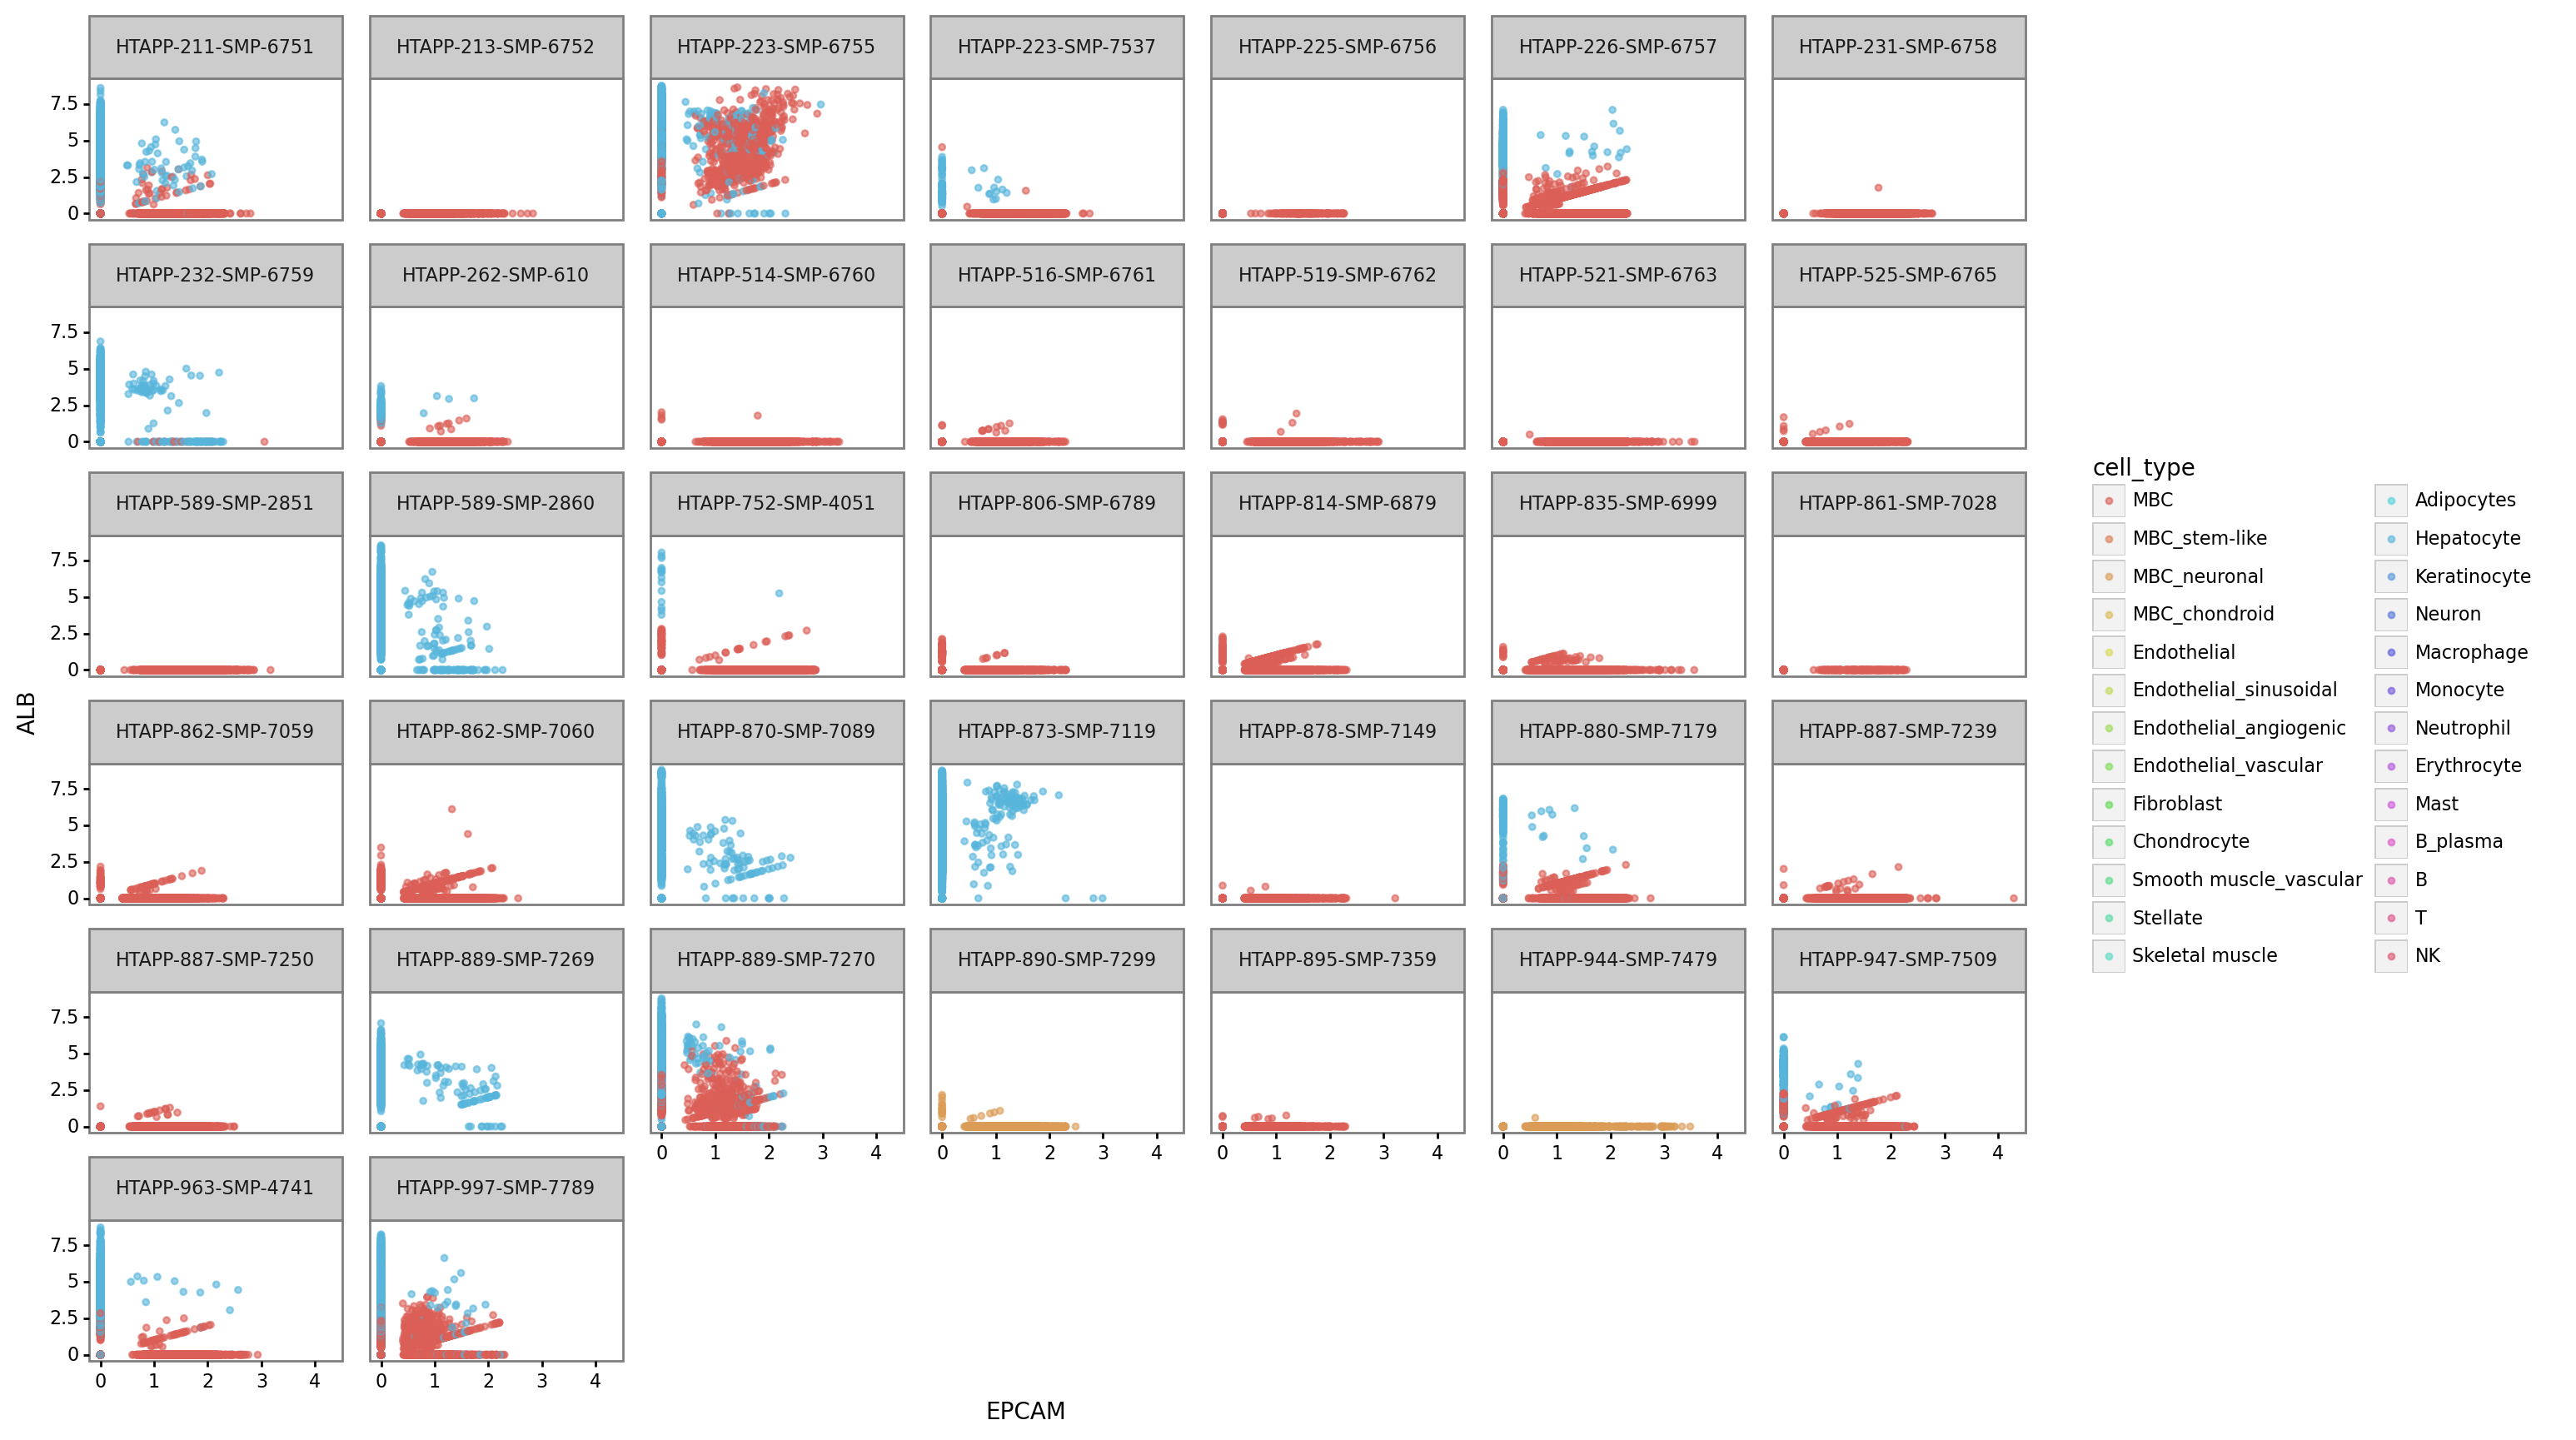

In [30]:
pl=ggplot(tmp_obs.loc[(tmp_obs.condition=="TST")&(tmp_obs.cell_type.isin(["Hepatocyte","MBC","MBC_stem-like","MBC_neuronal","MBC_chondroid"])),:],aes(x="EPCAM",y="ALB",color="cell_type"))+geom_point(alpha=0.6, size=1)+facet_wrap("name")
pl.draw().set_size_inches(15, 10)

In [40]:
tmp_obs.loc[(tmp_obs.cell_type.isin(["Hepatocyte"]))&(tmp_obs.ALB<0.01),:].name.value_counts()

HTAPP-997-SMP-7789    709
HTAPP-232-SMP-6759    486
HTAPP-589-SMP-2860    343
HTAPP-211-SMP-6751    306
HTAPP-226-SMP-6757    185
                     ... 
HTAPP-752-SMP-4051      0
HTAPP-745-SMP-3961      0
HTAPP-988-SMP-7749      0
HTAPP-662-SMP-3602      0
HTAPP-735-SMP-3841      0
Name: name, Length: 67, dtype: int64

In [45]:
#conclusion: the number of Hepatocytes that might actually be Epithelial (malignant) cells is very low --> not woth "rescuing".
tmp_obs.loc[(tmp_obs.cell_type.isin(["Hepatocyte"]))&(tmp_obs.ALB<0.01)&(tmp_obs.FGA<0.01)&(tmp_obs.EPCAM>0.5)&(tmp_obs.KRT19>0.5),:].name.value_counts()

HTAPP-285-SMP-751     13
HTAPP-321-SMP-1021    11
HTAPP-853-SMP-4381    10
HTAPP-313-SMP-932      8
HTAPP-889-SMP-7270     5
                      ..
HTAPP-783-SMP-4081     0
HTAPP-752-SMP-4051     0
HTAPP-745-SMP-3961     0
HTAPP-988-SMP-7749     0
HTAPP-211-SMP-6751     0
Name: name, Length: 67, dtype: int64